# 天池大赛·印象盐城

## 数据分析

初赛提供2012年1月-2017年10月盐城分车型销量配置数据。
第一阶段需要参赛者预测2017年11月盐城分车型销量数据，第二阶段需要参赛者预测2017年12月盐城分车型销量数据。

### 一、首先加载所需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 二、加载文件

In [31]:
train = pd.read_csv('[new] yancheng_train_20171226.csv', low_memory=False)
test = pd.read_csv('yancheng_testA_20171225.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20157 entries, 0 to 20156
Data columns (total 32 columns):
sale_date                20157 non-null int64
class_id                 20157 non-null int64
sale_quantity            20157 non-null int64
brand_id                 20157 non-null int64
compartment              20157 non-null int64
type_id                  20157 non-null int64
level_id                 20157 non-null object
department_id            20157 non-null int64
TR                       20157 non-null object
gearbox_type             20157 non-null object
displacement             20157 non-null float64
if_charging              20157 non-null object
price_level              20157 non-null object
price                    20157 non-null object
driven_type_id           20157 non-null int64
fuel_type_id             20157 non-null object
newenergy_type_id        20157 non-null int64
emission_standards_id    20157 non-null int64
if_MPV_id                20157 non-null int64
if_luxur

In [32]:
test.head()

,predict_date,class_id,predict_quantity
0,201711,103507,NaN
1,201711,124140,NaN
2,201711,125403,NaN
3,201711,136916,NaN
4,201711,169673,NaN


### 三、空值与特殊值

    经检查不存在空值
    
    特殊值

        车型级别    存在一个值为'-'

        排量        存在一个值为'0.'

        燃料种类    存在一个值为'-'
    
        功率        存在一个值是'81/70'

        缸数        存在一个值为'0'
    
        发动机扭矩  存在一个值是'-'

In [33]:
train[train.isnull().values==True]

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track


### 四、各字段数据的含义

| 字段 | 含义 | 示例 |
| ---- | ---- | ---- |
| sale_date | 销售日期 | 201201 |
| class_id | 车型ID | 234567 |
| sale_quantity | 销量 | 15 |
| brand_id | 品牌ID | 234 |
| compartment | 厢数 | 3 |
| type_id | 车型类别ID | 1 |
| level_id | 车型级别ID | 1 |
| department_id | 车型系别ID | 1 |
| TR | 变速器档位 | 6 |
| gearbox_type | 变速器形式 | AT |
| displacement | 排量 | 2.5 |
| if_charging | 是否增压 | L |
| price_level | 成交段 | 35-50W（“W”：万元，“WL”：万元以下） |
| driven_type_id | 驱动形式ID | 1 |
| fuel_type_id | 燃料种类ID | 1 |
| newenergy_type_id | 新能源类型ID | 1 |
| emission_standards_id | 排放标准ID | 1 |
| if_MPV_id | 是否微客MPV | 1 |
| if_luxurious_id | 是否豪华ID | 1 |
| power | 功率 | 160 |
| cylinder_number | 缸数 | 6 |
| engine_torque | 发动机扭矩 | 250 |
| car_length | 车长 | 4531 |
| car_width | 车宽 | 1817 |
| car_height | 车高 | 1421 |
| total_quality | 总质量 | 1980 |
| equipment_quality | 整备质量 | 1565 |
| rated_passenger | 额定载客 | 5 |
| wheelbase | 轴距 | 2760 |
| front_track | 前轮距 | 1500 |
| rear_track | 后轮距 | 1529 |

### 五、查看车辆某些属性与销量的关系

##### 销售日期

可以看出销量在随年份上涨，而且每年年底都会有一个峰值

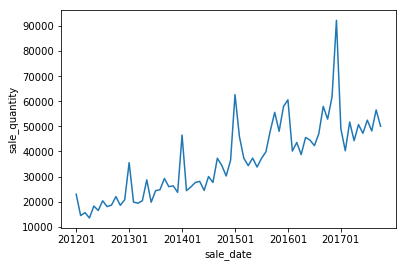

In [34]:
labels = ['sale_date', 'sale_quantity']
trainDate = train[labels]
trainDate = trainDate.groupby(trainDate['sale_date']).agg('sum').reset_index()
xlabel=range(len(trainDate))
plt.plot(xlabel, trainDate['sale_quantity'])
plt.xticks(np.arange(0,len(trainDate),12), trainDate['sale_date'][0::12])
plt.ylabel('sale_quantity')
plt.xlabel('sale_date')
plt.show()

##### 排量



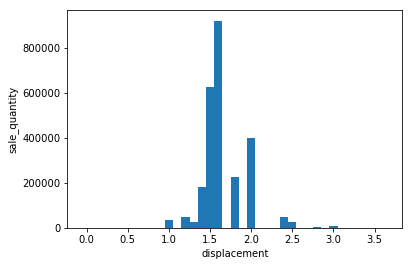

In [35]:
labels = ['displacement', 'sale_quantity']
trainPower = train[labels]
trainPower = trainPower.groupby(trainPower['displacement']).agg('sum').reset_index()
plt.bar(trainPower['displacement'], trainPower['sale_quantity'],width=0.1,align='center')
plt.ylabel('sale_quantity')
plt.xlabel('displacement')
plt.show()

##### 功率

其中17932,18554,18600三行的功率是81/70，不明白什么意思，可能是同一车型既有81功率也有70功率的，下面直接将这三行数据删除了

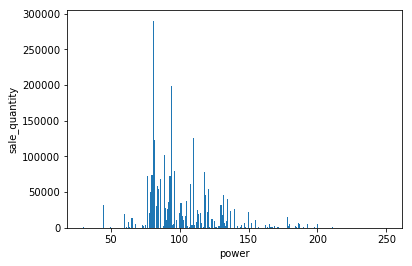

In [39]:
labels = ['power', 'sale_quantity']
trainPower = train[labels]
trainPower = trainPower.drop([17932,18554,18600],axis=0).reset_index(drop=True)
trainPower['power'] = trainPower['power'].astype('float32')
trainPower = trainPower.groupby(trainPower['power']).agg('sum').reset_index()
plt.bar(trainPower['power'], trainPower['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('power')
plt.show()

##### 长度

可以发现在4600左右销量最好。

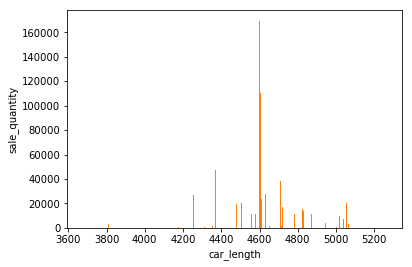

In [8]:
labels = ['car_length', 'sale_quantity']
trainLength = train[labels]
trainLength['car_length'].astype('float32')
trainLength = trainLength.groupby(trainLength['car_length']).agg('sum').reset_index()
plt.bar(trainLength['car_length'], trainLength['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('car_length')
plt.show()

##### 宽度

可以发现在1780左右销量最好。

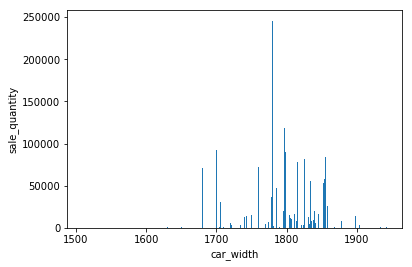

In [9]:
labels = ['car_width', 'sale_quantity']
trainWidth = train[labels]
trainWidth['car_width'].astype('float32')
trainWidth = trainWidth.groupby(trainWidth['car_width']).agg('sum').reset_index()
plt.bar(trainWidth['car_width'], trainWidth['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('car_width')
plt.show()

##### 高度

在高度为1460左右销量最高

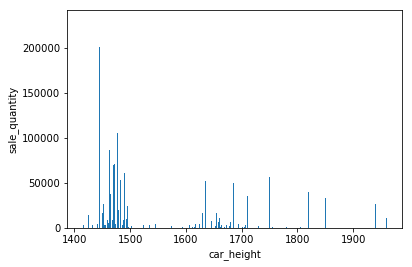

In [10]:
labels = ['car_height', 'sale_quantity']
trainHeight = train[labels]
trainHeight['car_height'].astype('float32')
trainHeight = trainHeight.groupby(trainHeight['car_height']).agg('sum').reset_index()
plt.bar(trainHeight['car_height'], trainHeight['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('car_height')
plt.show()

##### 质量

在1700到1850左右最受欢迎

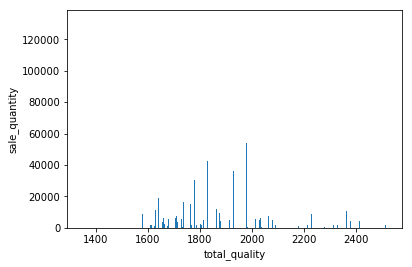

In [11]:
labels = ['total_quality', 'sale_quantity']
trainQuality = train[labels]
trainQuality['total_quality'].astype('float32')
trainQuality = trainQuality.groupby(trainQuality['total_quality']).agg('sum').reset_index()
plt.bar(trainQuality['total_quality'], trainQuality['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('total_quality')
plt.show()

##### 装备质量

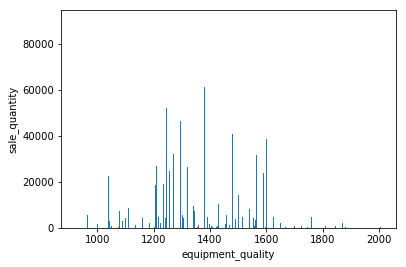

In [12]:
labels = ['equipment_quality', 'sale_quantity']
trainEQuality = train[labels]
trainEQuality['equipment_quality'].astype('float32')
trainEQuality = trainEQuality.groupby(trainEQuality['equipment_quality']).agg('sum').reset_index()
plt.bar(trainEQuality['equipment_quality'], trainEQuality['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('equipment_quality')
plt.show()

##### 轴距

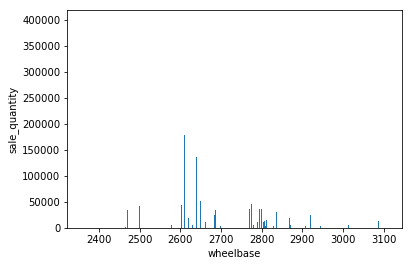

In [13]:
labels = ['wheelbase', 'sale_quantity']
trainWheelbase = train[labels]
trainWheelbase['wheelbase'].astype('float32')
trainWheelbase = trainWheelbase.groupby(trainWheelbase['wheelbase']).agg('sum').reset_index()
plt.bar(trainWheelbase['wheelbase'], trainWheelbase['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('wheelbase')
plt.show()

##### 前轮距

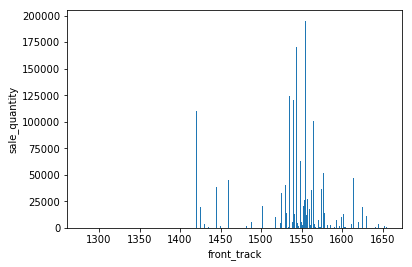

In [14]:
labels = ['front_track', 'sale_quantity']
trainFtrack = train[labels]
trainFtrack['front_track'].astype('float32')
trainFtrack = trainFtrack.groupby(trainFtrack['front_track']).agg('sum').reset_index()
plt.bar(trainFtrack['front_track'], trainFtrack['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('front_track')
plt.show()

##### 后轮距

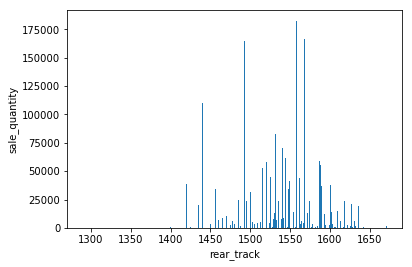

In [15]:
labels = ['rear_track', 'sale_quantity']
trainRtrack = train[labels]
trainRtrack['rear_track'].astype('float32')
trainRtrack = trainRtrack.groupby(trainRtrack['rear_track']).agg('sum').reset_index()
plt.bar(trainRtrack['rear_track'], trainRtrack['sale_quantity'])
plt.ylabel('sale_quantity')
plt.xlabel('rear_track')
plt.show()